In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
import numpy as np

In [3]:
!wget https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/dog-breed-identification.zip
!unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed-identification/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed-identification/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed-identification/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed-identification/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed-identification/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed-identification/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed-identification/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed-identification/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed-identification/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed-identification/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed-identification/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed-identificatio

In [4]:
!wget https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/interactive.zip
!unzip interactive.zip

--2022-05-14 06:57:28--  https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/interactive.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35245516 (34M) [application/x-zip-compressed]
Saving to: ‘interactive.zip’

interactive.zip     100%[===================>]  33.61M  64.6MB/s    in 0.5s    

2022-05-14 06:57:29 (64.6 MB/s) - ‘interactive.zip’ saved [35245516/35245516]

Archive:  interactive.zip
   creating: interactive/
   creating: interactive/doggos/
 extracting: interactive/doggos/2f879e3b-b55b-4652-aa5f-87543d145ae9.jpg  
  inflating: interactive/doggos/Image from iOS (2).jpg  
 extracting: interactive/doggos/Image from iOS (3).jpg  
  inflating: interactive/doggos/Image from iOS (4).jpg  
  inflating: interactive/doggos

In [5]:
!wget https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/urban-and-rural-photos.zip
!unzip urban-and-rural-photos.zip

--2022-05-14 06:57:29--  https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/urban-and-rural-photos.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3233188 (3.1M) [application/x-zip-compressed]
Saving to: ‘urban-and-rural-photos.zip’

urban-and-rural-pho 100%[===================>]   3.08M  --.-KB/s    in 0.02s   

2022-05-14 06:57:30 (194 MB/s) - ‘urban-and-rural-photos.zip’ saved [3233188/3233188]

Archive:  urban-and-rural-photos.zip
   creating: urban-and-rural-photos/
   creating: urban-and-rural-photos/rural_and_urban_photos/
   creating: urban-and-rural-photos/rural_and_urban_photos/train/
   creating: urban-and-rural-photos/rural_and_urban_photos/train/rural/
  inflating: urban-and-rural-photos/rural_and_urban_photos/tra

In [6]:
# HELPER
import matplotlib.pyplot as plt
import zipfile
from PIL import Image

def load_my_image(fname = 'dog-breed-identification/train/0246f44bb123ce3f91c939861eb97fb7.jpg'):
    '''returns array containing greyscale values for supplied file (at thumbnail size)'''
    
    image_color = Image.open(fname).resize((90, 125), Image.ANTIALIAS)
    image_grayscale = image_color.convert('L')
    image_array = np.asarray(image_grayscale)
    return(image_array)

def apply_conv_locally(conv, image_section):
    '''Returns output of applying conv to image_section. Both inputs are numpy arrays.
    image_section is assumed to be same size/shape as conv.
    '''
    out = (conv * image_section).sum()
    return out

def scale_for_display(image):
    '''Scales numpy array containing image data to be integers in range [0, 256]'''
    out = image - image.min()
    out = (out / out.max() * 256)
    return out.astype(int)


def apply_conv_to_image(conv, image):
    '''Applies conv (supplied as list of lists) to image (supplied as numpy array). Returns output array'''
    assert(type(image) == np.ndarray)
    print("----------------------------")
    print("Filter: ")
    print(np.array(conv))
    image_height, image_width = image.shape
    conv_array = np.array(conv)
    conv_height, conv_width = conv_array.shape
    filtered_image_height = image.shape[0] - conv_height + 1
    filtered_image_width = image.shape[1] - conv_width + 1
    filtered_image = np.zeros((filtered_image_height, filtered_image_width))
    for i in range(filtered_image_height):
        for j in range(filtered_image_width):
            filtered_image[i, j] = apply_conv_locally(conv_array, image[i:i+conv_height, j:j+conv_width])
    return(filtered_image)

def show(image, scale_before_display=True):
    '''Displays numpy array as image.  Scale_before_display ensures values are integers in [0, 256]'''
    if scale_before_display:
        to_display = scale_for_display(image)
    else:
        to_display = image
    plt.imshow(to_display, cmap='gray')
    plt.axis('off')
    plt.show()

# Intro

Images are made up of rows of pixels. For black and white (grayscale) images, each pixel has one numeric value indicating the "darkness" of the pixel.

In the below image, I have an picture depicting a handwritten number "2". The table beneath it depicts a snapshot of pixels. Those that are "0" are white, while those closer to "256" are pitch black.

![](https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/pics/pixelDarkness.PNG)

We can use patterns in these values to "see" the object in the image.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


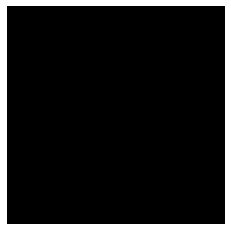

In [7]:
# A black square (2x2 image)
black = np.array([[255, 255], 
                  [255, 255]]).astype('uint8')

show(black)

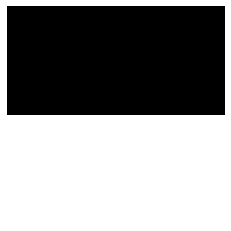

In [8]:
#A striped image, black on top, white on bottom. (2x2 image)
stripe = np.array([[0, 0],
                  [255, 255]]).astype('uint8')
show(stripe)

# Convolutions

Sources:

https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

![](https://miro.medium.com/max/588/1*BMngs93_rm2_BpJFH2mS0Q.gif)

By using a kernel, or small matrix, we can apply convolutions to search for patterns in images. We can "scan" the image and see if our output signifies any relationship. For example, let's use a kernel to detect a horizontal line.

In [9]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]

blackHorz = sum(sum(np.multiply(black, horizontal_line_conv)))
stripeHorz = sum(sum(np.multiply(stripe, horizontal_line_conv)))

print(f"Black Horz has a value of {blackHorz} after the convolution")
print(f"Stripe Horz has a value of {stripeHorz} after the convolution")

Black Horz has a value of 0 after the convolution
Stripe Horz has a value of -510 after the convolution


In [10]:
stripe2 = np.array([[250, 250],
                  [255, 255]]).astype('uint8')

stripeHorz1 = sum(sum(np.multiply(stripe2, horizontal_line_conv)))
print(f"Stripe Horz has a value of {stripeHorz1} after the convolution")

Stripe Horz has a value of -10 after the convolution


Since "Stripe" has a value different than 0 after the convolution, I posit that we detected a horizontal line.

Now, let's apply this matrix to a real image.

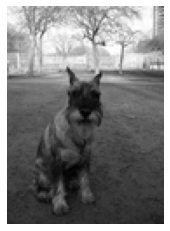

In [11]:
# load_my_image and visualize_conv are utility functions provided for this exercise
original_image = load_my_image() #make grayscale
show(original_image)

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]


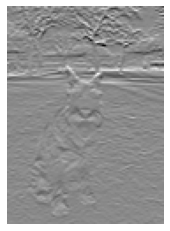

In [12]:
#apply horizontal line detector
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]

filtered = apply_conv_to_image(horizontal_line_conv, original_image)
show(filtered)

----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]


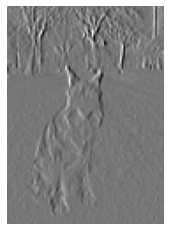

In [13]:
#apply vertical line detector
vertical_line_conv = [[1, -1], 
                        [1, -1]]

filtered = apply_conv_to_image(vertical_line_conv, original_image)
show(filtered)

### By combining convolutions, we can "see" new relationships in the image.

One layer might detect circles. The next layer may be able to then detect a "wheel"

![](https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/pics/howComputersSee.PNG)

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]


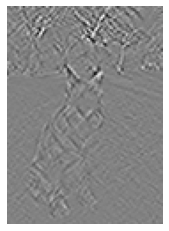

In [14]:
#Apply both
filtered = apply_conv_to_image(horizontal_line_conv, original_image)
filtered_both = apply_conv_to_image(vertical_line_conv, filtered)

show(filtered_both)

# Most of the time, we deal with colored images with three channels, (RGB).

![](https://miro.medium.com/max/2000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg)

However, the convolutions still work the same way. The kernel "slides" over each channel, producing a processed version of each. Some kernels may have stronger weights with specific channels more than others, for example, a kernel may respond more to a red channel than a green one.

![](https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

Let's look at a colored image.

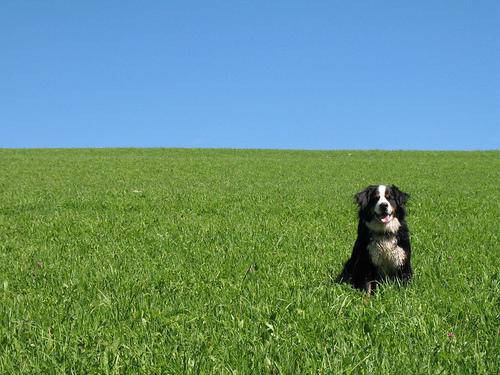

In [15]:
from IPython.display import Image, display

image_dir = 'dog-breed-identification/train/'
image_colored = image_dir + '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg'
display(Image(image_colored))

In [16]:
#load each image and standardize size
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [17]:
#List of one image
img_col_arr = read_and_prep_images([image_colored])[0]

img_col_arr[0, 0:5] #first 5 pixels of the first row

array([[102.061,  32.221, -35.68 ],
       [102.061,  32.221, -35.68 ],
       [102.061,  32.221, -35.68 ],
       [102.061,  32.221, -35.68 ],
       [103.061,  33.221, -34.68 ]], dtype=float32)

In [18]:
reds = img_col_arr[:, :, 0]
greens = img_col_arr[:, :, 1]
blues = img_col_arr[:, :, 2]

Reds:


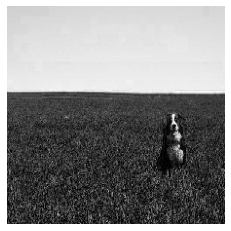

Greens:


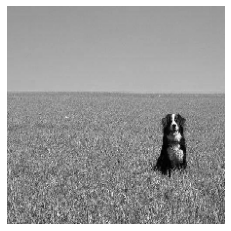

Blues:


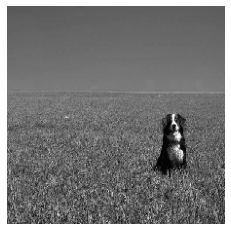

In [19]:
print("Reds:")
show(reds)
print("Greens:")
show(greens)
print("Blues:")
show(blues)

## Let's apply the same vertical and horizontal line convolutions from above

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
Reds:


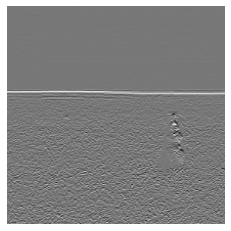

Greens:


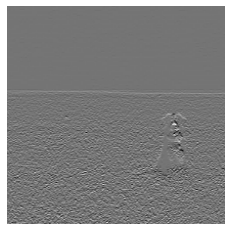

Blues:


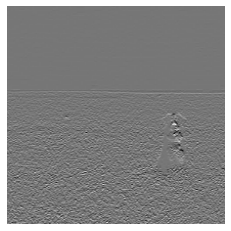

In [20]:
# Horizontal Convolution
filtered_reds = apply_conv_to_image(horizontal_line_conv, reds)
filtered_greens = apply_conv_to_image(horizontal_line_conv, greens)
filtered_blues = apply_conv_to_image(horizontal_line_conv, blues)

#Print
print("Reds:")
show(filtered_reds)
print("Greens:")
show(filtered_greens)
print("Blues:")
show(filtered_blues)

Horizontal Line Finder


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


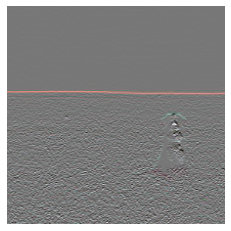

In [21]:
#Combine and display
combined_vert = np.dstack((filtered_reds, filtered_greens, filtered_blues))

print("Horizontal Line Finder")
plt.imshow(scale_for_display(combined_vert))
plt.axis('off')
plt.show()

----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Vertical Line Finder


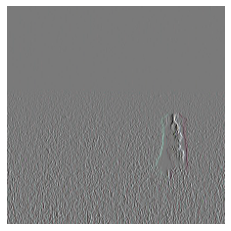

In [22]:
# Vertical line convolution
filtered_reds = apply_conv_to_image(vertical_line_conv, reds)
filtered_greens = apply_conv_to_image(vertical_line_conv, greens)
filtered_blues = apply_conv_to_image(vertical_line_conv, blues)

#Combine and show
combined_horz = np.dstack((filtered_reds, filtered_greens, filtered_blues))

print("Vertical Line Finder")
plt.imshow(scale_for_display(combined_horz))
plt.axis('off')
plt.show()

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]
----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Combined Convolution


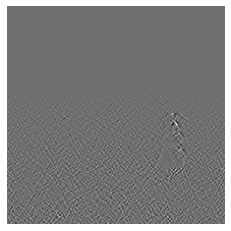

In [23]:
# Combined Convolution

filtered_reds = apply_conv_to_image(horizontal_line_conv, reds)
filtered_greens = apply_conv_to_image(horizontal_line_conv, greens)
filtered_blues = apply_conv_to_image(horizontal_line_conv, blues)

# Vertical line convolution
filtered_reds = apply_conv_to_image(vertical_line_conv, filtered_reds)
filtered_greens = apply_conv_to_image(vertical_line_conv, filtered_greens)
filtered_blues = apply_conv_to_image(vertical_line_conv, filtered_blues)

#Combine and show
combined_both = np.dstack((filtered_reds, filtered_greens, filtered_blues))

print("Combined Convolution")
plt.imshow(scale_for_display(combined_both))
plt.axis('off')
plt.show()

# ResNet50 and Transfer Learning

### ImageNet
ImageNet is an ongoing research effort to provide researchers around the world an easily accessible image database. Images of each concept are quality-controlled and human-annotated. In its completion, we hope ImageNet will offer tens of millions of cleanly sorted images for most of the concepts in the WordNet hierarchy.

### ResNet50

Deeper neural networks are more difficult to train. ResNet50 presents a residual learning framework to ease the training of networks that are substantially deeper than those used previously.

References:

https://www.kaggle.com/keras/resnet50

http://www.image-net.org/

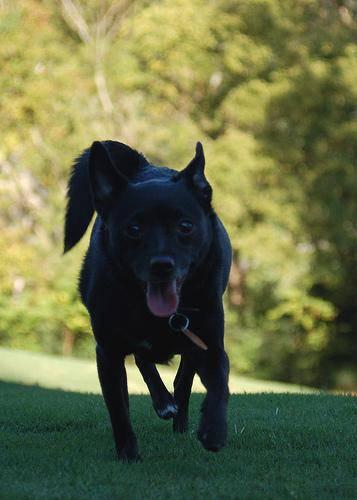

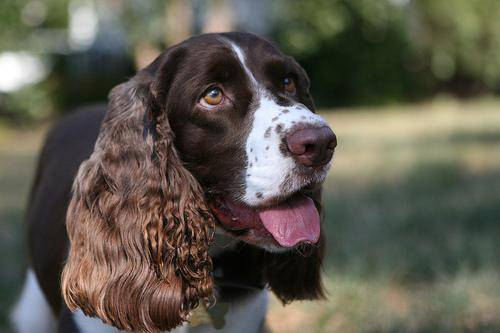

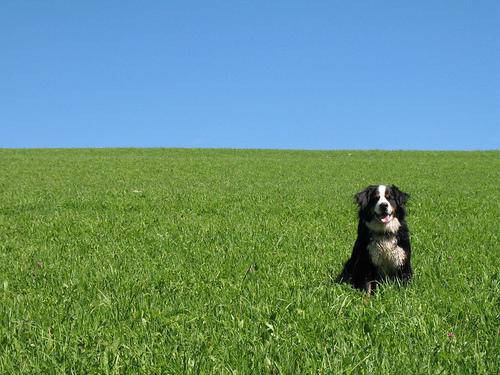

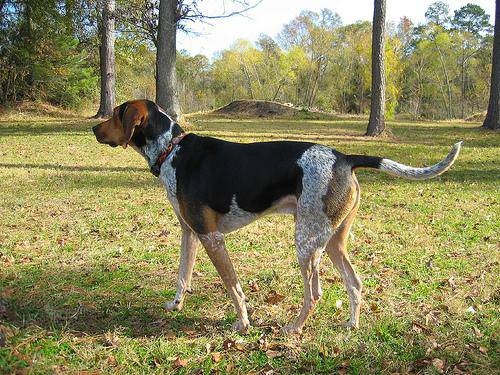

In [24]:
from os.path import join

image_dir = 'dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                            '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                            '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                            '0e79be614f12deb4f7cae18614b7391b.jpg']]

for img in img_paths:
    display(Image(img))

### Create Model with Pre-Trained Weights File. Make Predictions

In [25]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50(weights='imagenet')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

102981632/102967424 [==============================] - 1s 0us/step


In [26]:
import json
import requests

def decode_predictions(preds, top=5, class_list_path='https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/resnet50/imagenet_class_index.json'):
  """Decodes the prediction of an ImageNet model.
  Arguments:
      preds: Numpy tensor encoding a batch of predictions.
      top: integer, how many top-guesses to return.
      class_list_path: Path to the canonical imagenet_class_index.json file
  Returns:
      A list of lists of top class prediction tuples
      `(class_name, class_description, score)`.
      One list of tuples per sample in batch input.
  Raises:
      ValueError: in case of invalid shape of the `pred` array
          (must be 2D).
  """
  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
    
  data = requests.get(class_list_path).json()
  CLASS_INDEX = data
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

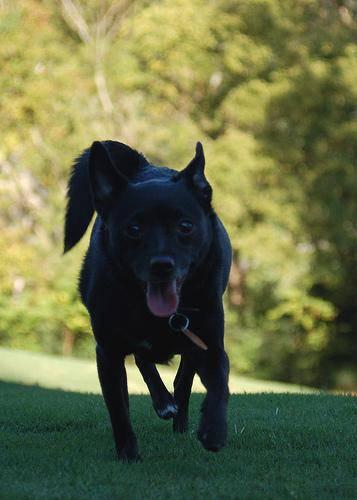

[('n02093256', 'Staffordshire_bullterrier', 0.37935838), ('n02099712', 'Labrador_retriever', 0.2618051), ('n02093428', 'American_Staffordshire_terrier', 0.21227579)]


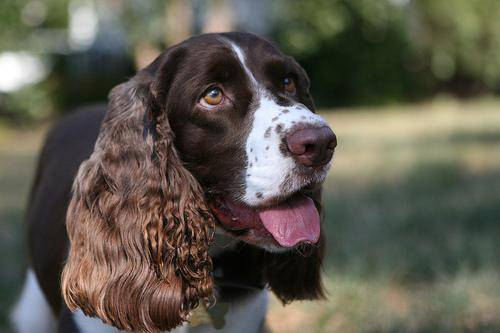

[('n02102040', 'English_springer', 0.9437974), ('n02101556', 'clumber', 0.023635125), ('n02102480', 'Sussex_spaniel', 0.009090565)]


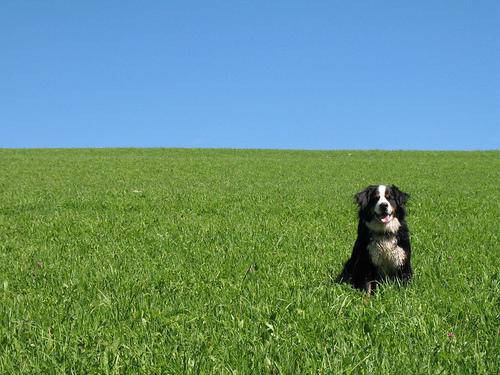

[('n02107683', 'Bernese_mountain_dog', 0.4576127), ('n02100735', 'English_setter', 0.2587648), ('n02102040', 'English_springer', 0.12304281)]


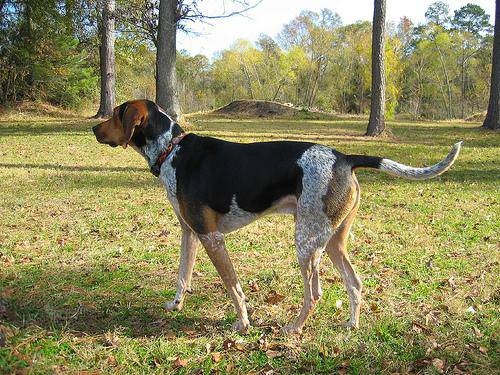

[('n02088632', 'bluetick', 0.99174434), ('n02089867', 'Walker_hound', 0.0067915274), ('n02089973', 'English_foxhound', 0.00085084775)]


In [27]:
most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [28]:
import pandas as pd

labels = pd.read_csv("dog-breed-identification/labels.csv")

In [29]:
#Print Actual Values
for i, img in enumerate(img_paths):
    ids = img.split("/")[2].split(".")[0]    
    print(labels.loc[labels.id == ids,].breed.values[0])

schipperke
english_springer
bernese_mountain_dog
bluetick


In [30]:
import os

In [31]:
# INTERACTIVE
# img_paths = ["interactive/pug_louis.jpeg", "interactive/bach.png"]
img_paths = ["interactive/doggos/" + x for x in os.listdir("interactive/doggos")]
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

#decode
most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(img_paths):
    display(Image(img_path, height=500, width=500))
    print(most_likely_labels[i])

Output hidden; open in https://colab.research.google.com to view.

### Transfer Learning

Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.  From the practical standpoint, reusing or transferring information from previously learned tasks for the learning of new tasks has the potential to significantly improve the sample efficiency of a reinforcement learning model.

![](https://miro.medium.com/max/1838/1*9GTEzcO8KxxrfutmtsPs3Q.png)

## What is a Pre-trained Model?

A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.

## Why use a Pre-trained Model?
Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from it.

![](https://storage.googleapis.com/computer-vision-smu-booth/booth_lecture/Computer%20Vision%20101/pics/resnetLayers.PNG)

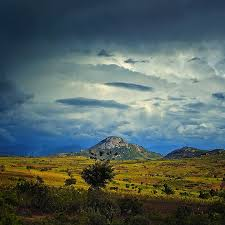

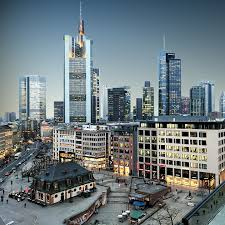

In [32]:
# Predict Rural or Urban
display(Image('urban-and-rural-photos/rural_and_urban_photos/train/rural/rural1.jpeg'))
display(Image('urban-and-rural-photos/rural_and_urban_photos/train/urban/urban_1.jpeg'))

In [33]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
# resnet_weights_path = 'resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5' # missing the prediction layer

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights="imagenet"))
my_new_model.add(Dense(num_classes, activation='softmax')) # last prediction year

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [34]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # neural net params

In [35]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Each class is in its own folder, no labels.csv
train_generator = data_generator.flow_from_directory(
        'urban-and-rural-photos/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'urban-and-rural-photos/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        validation_data=validation_generator,
        validation_steps=3)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


5/5 [==============================] - 18s 3s/step - loss: 0.5230 - accuracy: 0.6806 - val_loss: 0.4066 - val_accuracy: 0.9000


In [36]:
# Predict on the example images from above
labels = {0: "Rural", 1: "Urban"}

img_paths = ["urban-and-rural-photos/rural_and_urban_photos/train/rural/rural1.jpeg", "urban-and-rural-photos/rural_and_urban_photos/train/urban/urban_1.jpeg"]
test = read_and_prep_images(img_paths)
preds = my_new_model.predict(test)
print(preds)
[labels[np.argmax(x)] for x in preds]

[[0.7645467  0.23545325]
 [0.00438599 0.99561405]]


['Rural', 'Urban']

In [37]:
#INTERACTIVE
# img_paths = ["interactive/blueostrich.jpg"]
img_paths = ["interactive/rural_urban/" + x for x in os.listdir("interactive/rural_urban")]
test_data = read_and_prep_images(img_paths)
preds = my_new_model.predict(test_data)

for i, img_path in enumerate(img_paths):
    display(Image(img_path, width=500, height=500))
    print(preds[i])

Output hidden; open in https://colab.research.google.com to view.